In [131]:
# 9,CongestionWindow
# 17,SmoothedRTT
# 20,RetransmissionTimeout
# 21,SocketSendBufferSize
# 22,SocketSendBufferBytes
# 23,SocketReceiveBufferSize
# 24,SocketReceiveBufferBytes
# 25,UnacknowledgedBytes

# # With ECN and no ECN

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import matplotlib.pyplot as plt
# from gym import wrappers
# from gym import spaces
import math
import random
import re
import os
import sys

# import gym
# import tensorflow as tf
# from tensorflow.keras import layers
col = ['Direction', 'Hash', 'Time', 'LocalIP', 'LocalPort', 'ForeignIP', 'ForeignPort', 'SlowStartThreshold', 'CongestionWindow', 'BandwidthControlledWindow', 'SendingWindow', 'ReceiveWindow', 'SendingWindowScalingFactor', 'ReceiveWindowScalingFactor', 'TCPFiniteStateMachine',
       'MaximumSegmentSize', 'SmoothedRTT', 'SACKEnabled', 'TCPFlags', 'RetransmissionTimeout', 'SocketSendBufferSize', 'SocketSendBufferBytes', 'SocketReceiveBufferSize', 'SocketReceiveBufferBytes', 'UnacknowledgedBytes', 'ReassemblyQueue', 'Flowid', 'Flowtype']


In [133]:
def functionfilenameandpath(path='./',extension='.csv'):
    # Path is the path where you want to search

    # this is the extension you want to detect


    filepaths=[]
    filenames=[]

    # print(path)

    for root, dirs_list, files_list in os.walk(path):
        # print("root",root)
        # print("dirs_list",dirs_list)
        # print("files_list",files_list)
        for file_name in files_list:
            if os.path.splitext(file_name)[-1] == extension:
                file_name_path = os.path.join(root, file_name)
                # if(file_name.find('Home')!=-1):
                #     filenames.append(file_name)
                #     filepaths.append(file_name_path)
                filenames.append(file_name)
                filepaths.append(file_name_path)
                # print(file_name)
                # print(file_name_path)   # This is the full path of the filter file

   
    return filenames,filepaths

In [134]:
folderpath="./datatest1"
filenames,filepaths=functionfilenameandpath(folderpath,'.log')

filepaths.sort()
filenames.sort()
print(filenames)

['codel1_ecn.siftr.log', 'codel1_noecn.siftr.log', 'codel2_ecn.siftr.log', 'codel2_noecn.siftr.log', 'fqcodel1_ecn.siftr.log', 'fqcodel1_noecn.siftr.log', 'fqcodel2_ecn.siftr.log', 'fqcodel2_noecn.siftr.log', 'fqpie1_ecn.siftr.log', 'fqpie1_noecn.siftr.log', 'fqpie2_ecn.siftr.log', 'fqpie2_noecn.siftr.log', 'pie1_ecn.siftr.log', 'pie1_noecn.siftr.log', 'pie2_ecn.siftr.log', 'pie2_noecn.siftr.log']


In [135]:
# for i in range(len(col)):
#     print(i+1,end=",")
#     print(col[i])


count    14539.000000
mean         0.172478
std          0.044375
min          0.000000
25%          0.146250
50%          0.177500
75%          0.192188
max          0.821875
Name: SmoothedRTT, dtype: float64
16480    0.000000
16595    0.000000
16596    0.821875
16604    0.821875
16698    0.821875
Name: SmoothedRTT, dtype: float64
53120    0.491563
53121    0.491563
53122    0.491563
53134    0.491563
53135    0.445312
Name: SmoothedRTT, dtype: float64


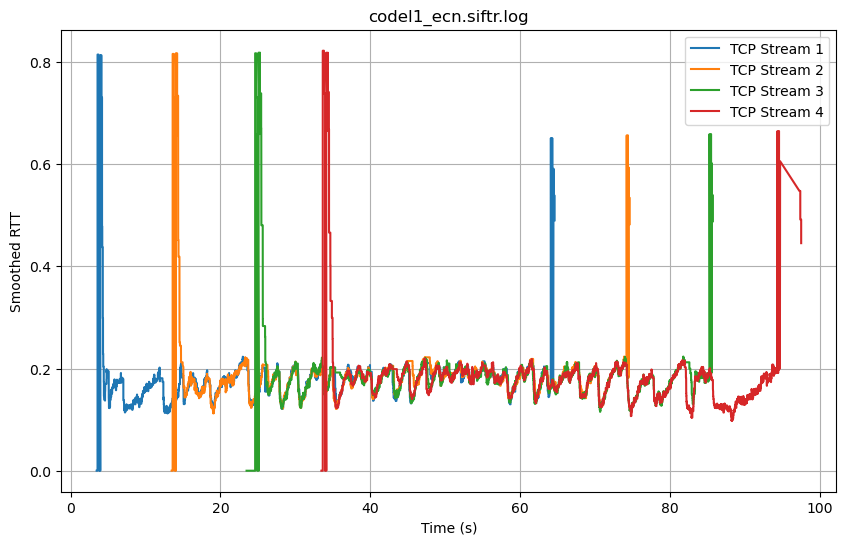

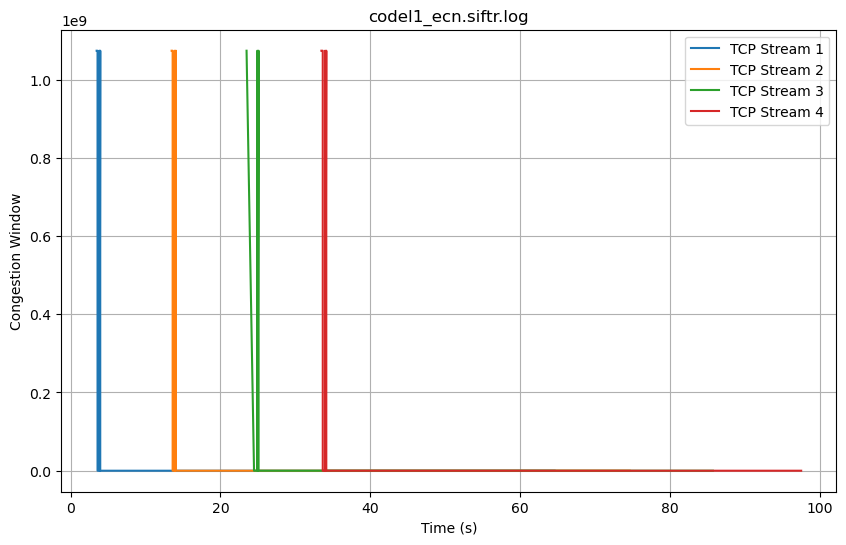

In [136]:
dataframe_list=[]
data_filename_list=[]
data_dict={}
for index in range(len(filenames)):
    # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
    data = []
    with open("./datatest1/"+filenames[index], 'r') as f:
        # store the data
        for line in f:
            tem = re.sub(r'\s', '', line)
            data.append(tem.split(','))
    # remove file line of data
    data.pop(0)
    data.pop(len(data)-1)

    # define variables from enable_time_secs=1716792031	enable_time_usecs=061770	
    # siftrver=1.2.4 hz=100	tcp_rtt_scale=32	sysname=FreeBSD	sysver=1301000	ipmode=4
    enable_time_secs = 1716792031
    enable_time_usecs = 61770
    siftver = '1.2.4'
    hz = 100
    tcp_rtt_scale = 32
    sysname = 'FreeBSD'
    sysver = 1301000
    ipmode = 4



    df = pd.DataFrame(data, columns=col)

    # congestion window to int
    df = df.astype({'CongestionWindow': 'int32'})
    
    # Convert 'Time' column to float64 type
    df['Time'] = df['Time'].astype('float64')

    # Subtract the first time entry from all the entries in 'Time' column
    df['Time'] = df['Time'] - df['Time'].iloc[0]



    # remove rows that congestion window bigger than 70000
    # df = df[df['CongestionWindow'].astype(int) < 70000]
    # RTT divide by tcp_rtt_scale * hz
    df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
    df['SmoothedRTT'] = df['SmoothedRTT'] / (tcp_rtt_scale * hz)
    df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')



    # first path ForeignPort = 5101
    dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

    # second path localip = 5102
    dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

    # third path ForeignPort = 5101
    dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

    # fourth path localip = 5102
    dfPath4 = df.loc[(df['ForeignPort'] == '5104')]
    
    # data_filename_list.append(filenames[index])
    # dataframe_list.append(dfPath1.copy())
    # data_dict[filenames[index]]=dfPath1.copy()
    print(dfPath4['SmoothedRTT'].describe())
    print(dfPath4['SmoothedRTT'].head(5))
    print(dfPath4['SmoothedRTT'].tail(5))


    

    # Plot Smoothed RTT vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1')
    plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2')
    plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3')
    plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4')
    plt.xlabel('Time (s)')
    plt.ylabel('Smoothed RTT')
    plt.title(filenames[index])
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot CWND vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(dfPath1['Time'], dfPath1['CongestionWindow'], label='TCP Stream 1')
    plt.plot(dfPath2['Time'], dfPath2['CongestionWindow'], label='TCP Stream 2')
    plt.plot(dfPath3['Time'], dfPath3['CongestionWindow'], label='TCP Stream 3')
    plt.plot(dfPath4['Time'], dfPath4['CongestionWindow'], label='TCP Stream 4')
    plt.xlabel('Time (s)')
    plt.ylabel('Congestion Window')
    plt.title(filenames[index])
    plt.legend()
    plt.grid(True)
    plt.show()

    
    break;
    


In [137]:
len(dataframe_list)

0

In [138]:
dataframe_list[0].head(2)

IndexError: list index out of range

In [ ]:
dataframe_list[0].tail(2)

,Direction,Hash,Time,LocalIP,LocalPort,ForeignIP,ForeignPort,SlowStartThreshold,CongestionWindow,BandwidthControlledWindow,...,TCPFlags,RetransmissionTimeout,SocketSendBufferSize,SocketSendBufferBytes,SocketReceiveBufferSize,SocketReceiveBufferBytes,UnacknowledgedBytes,ReassemblyQueue,Flowid,Flowtype
48920,i,0x00000000,85.705874,172.16.1.2,65512,172.16.3.2,5103,10860,14480,0,...,1012,261,33580,1,65700,0,2,0,0,0
48925,i,0x00000000,85.706081,172.16.1.2,65512,172.16.3.2,5103,10860,14480,0,...,1012,250,33580,0,65700,0,0,0,0,0


In [ ]:
data_dict

{'codel1_ecn.siftr.log':       Direction        Hash       Time     LocalIP LocalPort   ForeignIP  \
 10331         o  0x00000000  23.479862  172.16.1.2     65512  172.16.3.2   
 10980         o  0x00000000  24.476268  172.16.1.2     65512  172.16.3.2   
 11069         i  0x00000000  24.625752  172.16.1.2     65512  172.16.3.2   
 11070         o  0x00000000  24.625797  172.16.1.2     65512  172.16.3.2   
 11071         o  0x00000000  24.626264  172.16.1.2     65512  172.16.3.2   
 ...         ...         ...        ...         ...       ...         ...   
 48863         i  0x00000000  85.583753  172.16.1.2     65512  172.16.3.2   
 48872         o  0x00000000  85.584679  172.16.1.2     65512  172.16.3.2   
 48873         o  0x00000000  85.584911  172.16.1.2     65512  172.16.3.2   
 48920         i  0x00000000  85.705874  172.16.1.2     65512  172.16.3.2   
 48925         i  0x00000000  85.706081  172.16.1.2     65512  172.16.3.2   
 
       ForeignPort SlowStartThreshold  CongestionW

In [ ]:
for i in range(len(col)):
    print(i,end=",")
    print(col[i])


0,Direction
1,Hash
2,Time
3,LocalIP
4,LocalPort
5,ForeignIP
6,ForeignPort
7,SlowStartThreshold
8,CongestionWindow
9,BandwidthControlledWindow
10,SendingWindow
11,ReceiveWindow
12,SendingWindowScalingFactor
13,ReceiveWindowScalingFactor
14,TCPFiniteStateMachine
15,MaximumSegmentSize
16,SmoothedRTT
17,SACKEnabled
18,TCPFlags
19,RetransmissionTimeout
20,SocketSendBufferSize
21,SocketSendBufferBytes
22,SocketReceiveBufferSize
23,SocketReceiveBufferBytes
24,UnacknowledgedBytes
25,ReassemblyQueue
26,Flowid
27,Flowtype


In [ ]:


# # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
# data = []
# with open('./codelscenario1.siftr.log', 'r') as f:
#     # store the data
#     for line in f:
#         tem = re.sub(r'\s', '', line)
#         data.append(tem.split(','))
# # remove file line of data
# data.pop(0)
# data.pop(len(data)-1)



# df = pd.DataFrame(data, columns=col)

# # congestion window to int
# df = df.astype({'CongestionWindow': 'int32'})
# # remove rows that congestion window bigger than 70000
# # df = df[df['CongestionWindow'].astype(int) < 70000]

# df['CongestionWindow'].nunique()
# df['ReceiveWindow'].nunique()


# # first path localIP = 172.16.1.2
# dfPath1 = df.loc[(df['LocalIP'] == '172.16.1.2' )]

# # second path localip = 172.16.2.2
# dfPath2 = df.loc[(df['LocalIP'] == '172.16.2.2')]


# # define variables from enable_time_secs=1664453702	enable_time_usecs=194696	
# # siftrver=1.2.4 hz=1000	tcp_rtt_scale=32	sysname=FreeBSD	sysver=1100077	ipmode=4
# enable_time_secs = 1664453702
# enable_time_usecs = 194696
# siftver = '1.2.4'
# hz = 1000
# tcp_rtt_scale = 32
# sysname = 'FreeBSD'
# sysver = 1100077
# ipmode = 4


# # RTT divide by tcp_rtt_scale * hz
# dfPath1['SmoothedRTT'] = dfPath1['SmoothedRTT'].astype(int)
# # dfPath1['SmoothedRTT'] = dfPath1['SmoothedRTT'] / (tcp_rtt_scale * hz)
# dfPath2['SmoothedRTT'] = dfPath2['SmoothedRTT'].astype(int)
# # dfPath2['SmoothedRTT'] = dfPath2['SmoothedRTT'] / (tcp_rtt_scale * hz)

In [ ]:
# for index in range(len(filenames)):
#     dataframe_list[index]
#     plt.plot(dataframe_list[index].index[:5000],dataframe_list[index]['SmoothedRTT'][:5000], label=filenames[index])

# plt.legend()
# plt.show()

In [ ]:
# # plot congestion window and received window
# plt.plot(dfPath1['SmoothedRTT'])
# plt.show()

# # plot congestion window and received window
# plt.plot(dfPath1['SmoothedRTT'][:5000])
# plt.show()

# plt.plot(dfPath1["CongestionWindow"][:40])
# plt.show()

# plt.plot(dfPath1["CongestionWindow"][25:])
# plt.show()

# plt.plot(dfPath1["CongestionWindow"][15000:])
# plt.show()